## Set Up Library

In [ ]:
!python --version

Python 3.7.12


In [ ]:
!pip install scikit-learn==0.22.2.post1

In [ ]:
cd /content/drive/MyDrive/MBKM RISET/RISET_1

/content/drive/MyDrive/MBKM RISET/RISET_1


In [ ]:
import numpy as np
import joblib
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

## Save Dataset to npy

In [ ]:
def load_feature_label(file_live,file_spoof,split_size):
  #load dataset
  live_label = np.load(file_live)
  spoof_label = np.load(file_spoof)

  #mengabungkan dataset
  feature_label = np.concatenate([live_label, spoof_label])
  print("Shape dataset : " + str(feature_label.shape))

  #shuffle dataset
  np.random.shuffle(feature_label)

  #split training
  training_length = int(len(feature_label) * split_size)
  testing_length = int(len(feature_label) - training_length)
  training_set = feature_label[0:training_length]
  testing_set = feature_label[-testing_length:]
  print("Jumlah data training :" + str(training_length))
  print("Jumlah data testing :" + str(testing_length))
  return training_set[:,:-1],training_set[:,-1].astype(np.uint8),testing_set[:,:-1],testing_set[:,-1].astype(np.uint8)

In [ ]:
train_feature,train_label,test_feature,test_label = load_feature_label("live_new.npy","spoof_new.npy",.8)

Shape dataset : (718, 10001)
Jumlah data training :574
Jumlah data testing :144


In [ ]:
np.save("train_feature_1.npy",train_feature)
np.save("train_label_1.npy",train_label)
np.save("test_feature_1.npy",test_feature)
np.save("test_label_1.npy",test_label)

## Load Dataset

In [ ]:
train_feature = np.load("train_feature.npy")
train_label = np.load("train_label.npy")
test_feature_1 = np.load("test_feature.npy")
test_label_1 = np.load("test_label.npy")

In [ ]:
train_feature = np.load("train_feature_1.npy")
train_label = np.load("train_label_1.npy")
test_feature = np.load("test_feature_1.npy")
test_label = np.load("test_label_1.npy")

In [ ]:
test_feature_2 = np.concatenate([test_feature_1,test_feature])
test_label_2 = np.concatenate([test_label_1,test_label])

In [ ]:
print(str(test_feature_2.shape))
print(str(test_label_2.shape))

(202, 10000)
(202,)


In [ ]:
print(str(train_feature.shape))
print(str(train_label.shape))
print(str(test_feature.shape))
print(str(test_label.shape))

(574, 10000)
(574,)
(144, 10000)
(144,)


In [ ]:
%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab
import random 

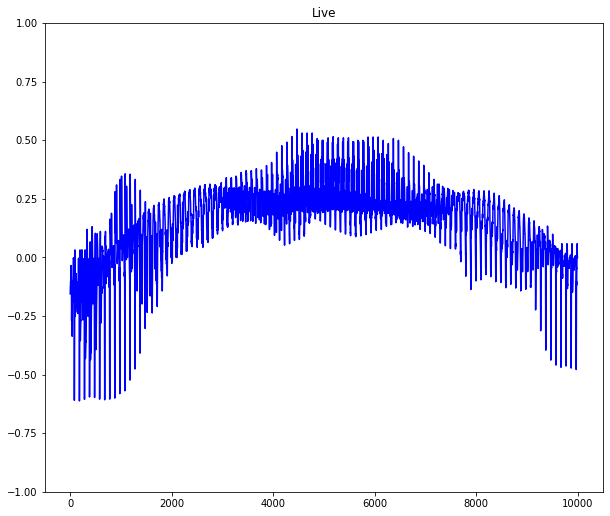

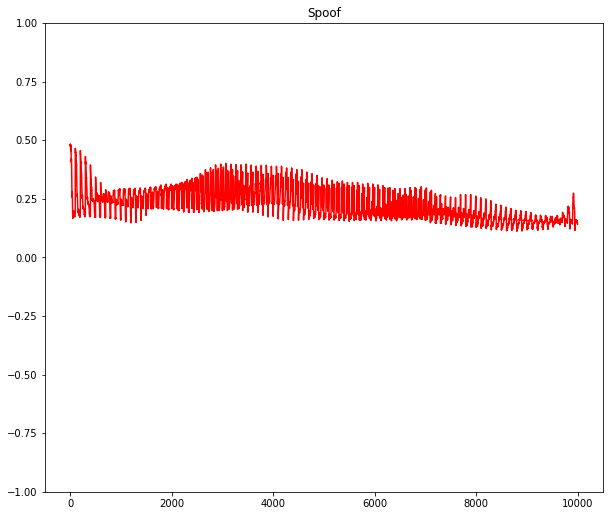

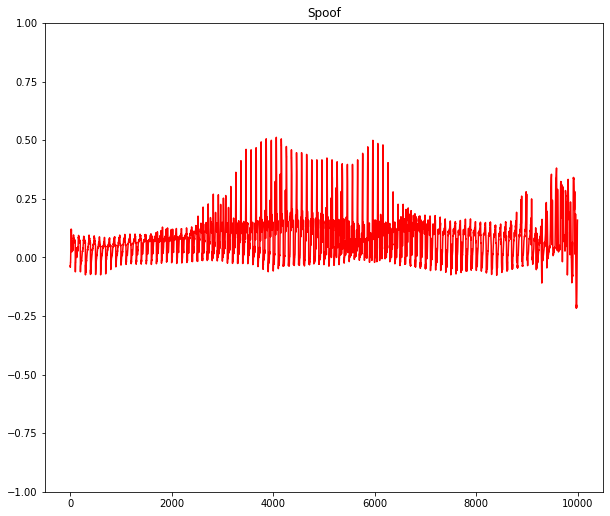

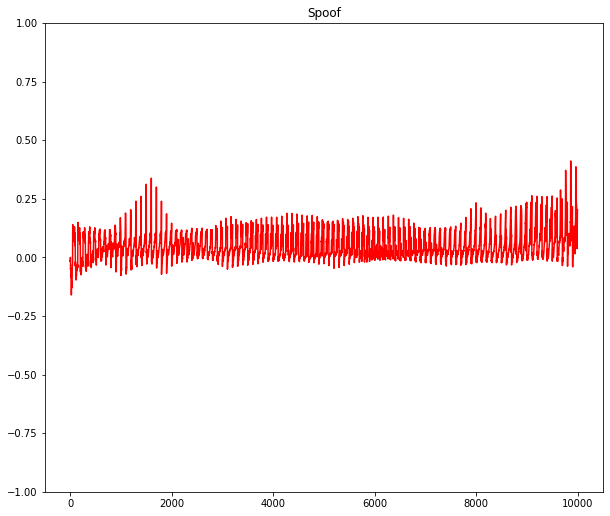

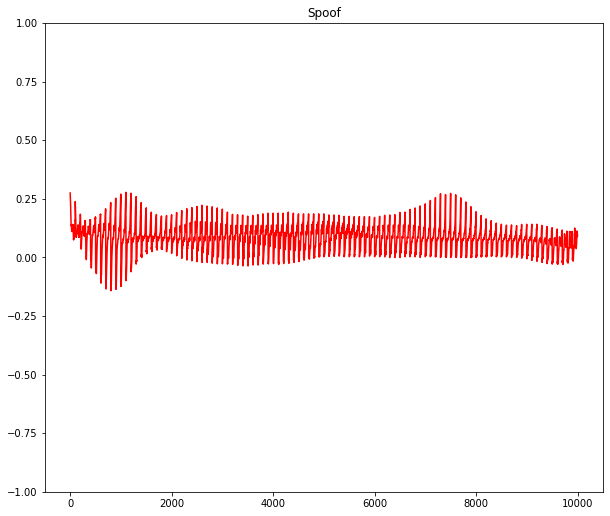

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 50.0)
fig = 0
for n in range(0,5):
  fig += 1
  ax = plt.subplot(5, 1, fig)
  x = random.randint(0, 518)
  if (train_label[x] == 1):
    title = "Live"
    clr = 'blue'
  elif (train_label[x] == 0):
    title = "Spoof"
    clr = 'red'
  plt.plot(np.squeeze(train_feature[x]),color = clr) 
  plt.ylim(-1, 1)
  plt.title(title)
  plt.show()

## Tunning Hyperparameter

In [ ]:
tuned_parameters = [{'kernel': ['rbf'],
                    'gamma': ['auto', 'scale'],
                    'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'],
                    'gamma': ['auto', 'scale'],
                    'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'],
                    'gamma': ['auto', 'scale'],
                    'C': [1, 10, 100, 1000],
                    'degree' : [1,2,3,4,5,6,7,8,9,10]},
                    {'kernel': ['linear'],
                    'C': [1, 10, 100, 1000]}]

In [ ]:
scores = ['precision']
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()
  clf = GridSearchCV(
  # SVC(), tuned_parameters, scoring='f1', cv = [(slice(None),slice(None))]
  SVC(), tuned_parameters, scoring='f1')
  clf.fit(train_feature, train_label)
  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
  print("Best Estimator set found on development set:")
  print()
  print(clf.best_estimator_)
  print()
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
  print()
  print("Detailed classification report:")
  print()
  print("The model is trained on the full development set.")
  print("The scores are computed on the full evaluation set.")
  print()
  y_true, y_pred = test_label, clf.predict(test_feature)
  print(classification_report(y_true, y_pred))
  print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best Estimator set found on development set:

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Grid scores on development set:

0.948 (+/-0.034) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.998 (+/-0.009) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.995 (+/-0.011) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.993 (+/-0.019) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.993 (+/-0.011) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.993 (+/-0.019) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.993 (+/-0.011) for {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
0.993 (+/-0.019) for {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
0.931 (+/-0

In [ ]:
df_SG = pd.DataFrame(clf.cv_results_)
df_SG.to_csv (r'/content/drive/MyDrive/MBKM RISET/SG_NEW_31_Oct(0).csv', index =
False, header=True)

In [ ]:
tuned_parameters = [{'kernel': ['rbf'],
                      'gamma': [80, 75, 70, 65, 60, 55, 50, 45, 35, 30, 25, 20,
                                15, 10, 5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 'auto', 'scale'],
                      'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150,
                           200, 250, 300, 350, 400, 450, 500, 1000]}]

In [ ]:
scores = ['precision']
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()
  clf = GridSearchCV(
  # SVC(), tuned_parameters, scoring='f1', cv = [(slice(None),slice(None))]
  SVC(), tuned_parameters, scoring='f1')
  clf.fit(train_feature, train_label)
  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
  print("Best Estimator set found on development set:")
  print()
  print(clf.best_estimator_)
  print()
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
  print()
  print("Detailed classification report:")
  print()
  print("The model is trained on the full development set.")
  print("The scores are computed on the full evaluation set.")
  print()
  y_true, y_pred = test_label, clf.predict(test_feature)
  print(classification_report(y_true, y_pred))
  print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Best Estimator set found on development set:

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Grid scores on development set:

0.000 (+/-0.000) for {'C': 1, 'gamma': 80, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 75, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 70, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 65, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 60, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 55, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 50, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 45, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 35, 'kernel': 'rbf'}
0.0

In [ ]:
import pandas as pd

In [ ]:
df_SG = pd.DataFrame(clf.cv_results_)
df_SG.to_csv (r'/content/drive/MyDrive/MBKM RISET/SG_NEW_31_Oct.csv', index =
False, header=True)

## SVM RBF

In [ ]:
SVM_Model = SVC(C= 1, kernel= 'rbf', gamma = 0.001)
SVM_Model.fit(train_feature,train_label)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score :  0.9930555555555556
Jumlah Support Vector :  162
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.99      1.00      0.99        74

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



Text(0.5, 1.0, 'Confusion matrix')

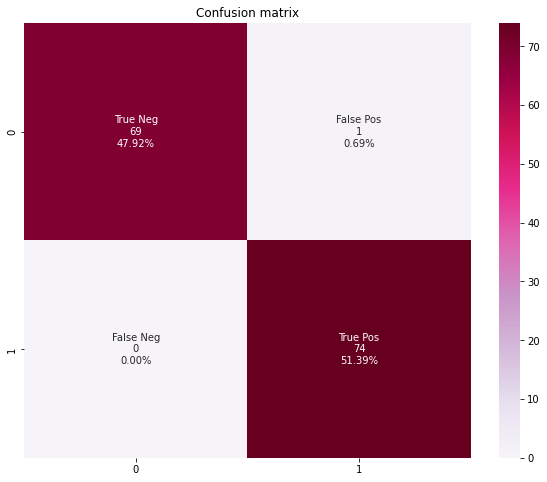

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
print("Score : ", SVM_Model.score(test_feature,test_label))
print("Jumlah Support Vector : ", len(SVM_Model.support_vectors_))
y_true, y_pred = test_label, SVM_Model.predict(test_feature)
print(classification_report(y_true, y_pred))
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuRd').set_title("Confusion matrix")

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve, auc
def metric_roc(y_true,y_pred,save_file):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
  acc = (tp+tn)/(tp+tn+fp+fn)
  far = fp / (fp + tn) # apcer
  frr = fn / (tp + fn) # bpcer
  hter=(far+frr) / 2 # acer

  fpr, tpr, threshold = roc_curve(y_true, y_pred)
  auc_v = auc(fpr, tpr) # area under curve
  dist = abs((1-fpr) - tpr)
  eer = fpr[np.argmin(dist)]
  plt.plot(fpr, tpr, label='area under curve(auc): %0.2f' % auc_v)
  plt.plot([0, 1], [1, 0])
  plt.plot([eer, eer], [0,tpr[np.argmin(dist)]],label = '@EER',linestyle='--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title(save_file)
  plt.legend()
  plt.savefig(save_file + ".png")
  return acc,far,frr,hter

(0.9827586206896551, 0.02857142857142857, 0.0, 0.014285714285714285)

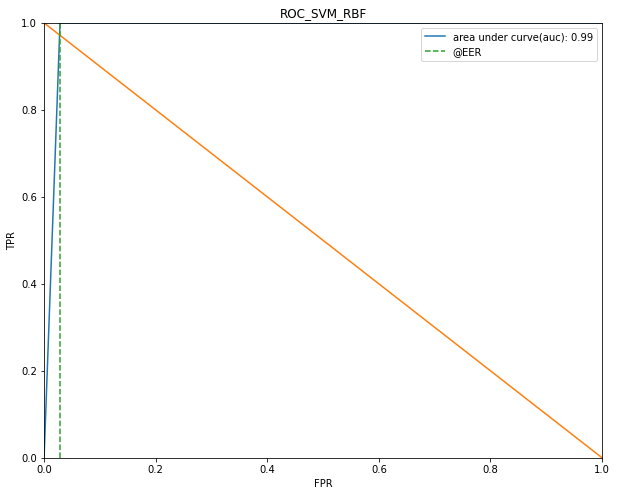

In [ ]:
metric_roc(y_true,y_pred,'ROC_SVM_RBF')

In [ ]:
joblib.dump(SVM_Model, '/content/drive/MyDrive/MBKM RISET/SVM_RBF_DIFF.pkl')

['/content/drive/MyDrive/MBKM RISET/SVM_RBF_DIFF.pkl']

## SVM Linear

In [ ]:
SVM_Model_Linear = SVC(C= 1, kernel= 'linear')
SVM_Model_Linear.fit(train_feature,train_label)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score :  1.0
Jumlah Support Vector :  61
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        74

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



Text(0.5, 1.0, 'Confusion matrix')

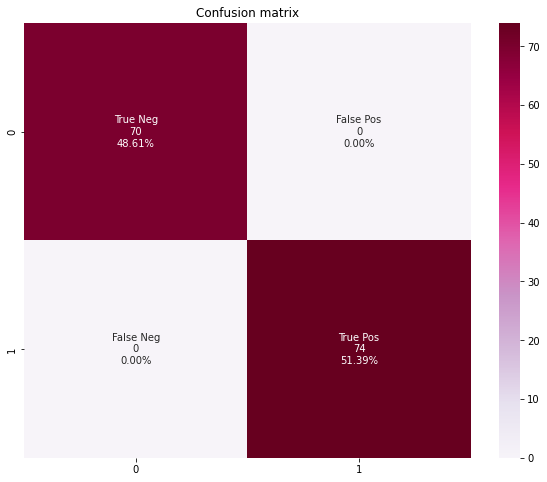

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
print("Score : ", SVM_Model_Linear.score(test_feature,test_label))
print("Jumlah Support Vector : ", len(SVM_Model_Linear.support_vectors_))
y_true, y_pred = test_label, SVM_Model_Linear.predict(test_feature)
print(classification_report(y_true, y_pred))
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuRd').set_title("Confusion matrix")

(0.9827586206896551, 0.02857142857142857, 0.0, 0.014285714285714285)

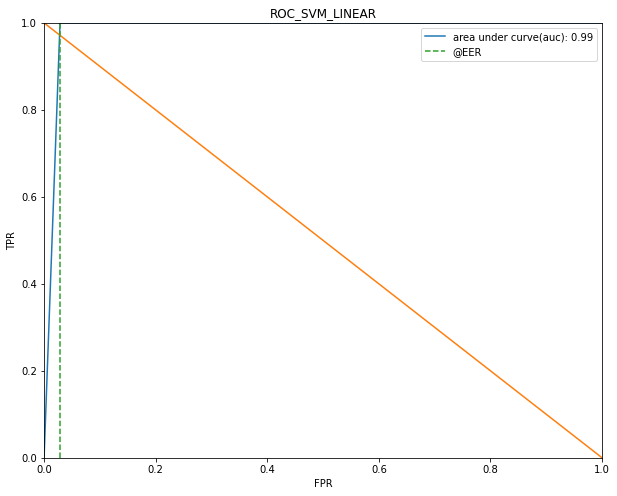

In [ ]:
metric_roc(y_true,y_pred,'ROC_SVM_LINEAR')

In [ ]:
joblib.dump(SVM_Model_Linear, '/content/drive/MyDrive/MBKM RISET/SVM_LINEAR_DIFF_2.pkl')

['/content/drive/MyDrive/MBKM RISET/SVM_LINEAR_DIFF_2.pkl']

## Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(train_feature, train_label).predict(test_feature)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.78      0.91      0.84        23

    accuracy                           0.86        58
   macro avg       0.86      0.87      0.86        58
weighted avg       0.87      0.86      0.86        58



Text(0.5, 1.0, 'Confusion matrix')

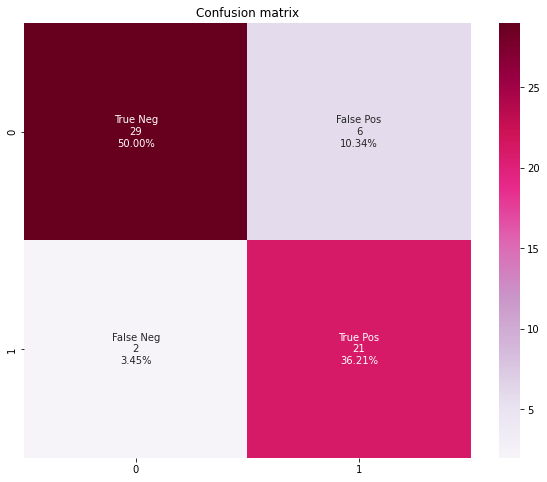

In [ ]:
y_true, y_pred = test_label, gnb.predict(test_feature)
print(classification_report(y_true, y_pred))
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuRd').set_title("Confusion matrix")

(0.8620689655172413,
 0.17142857142857143,
 0.08695652173913043,
 0.12919254658385093)

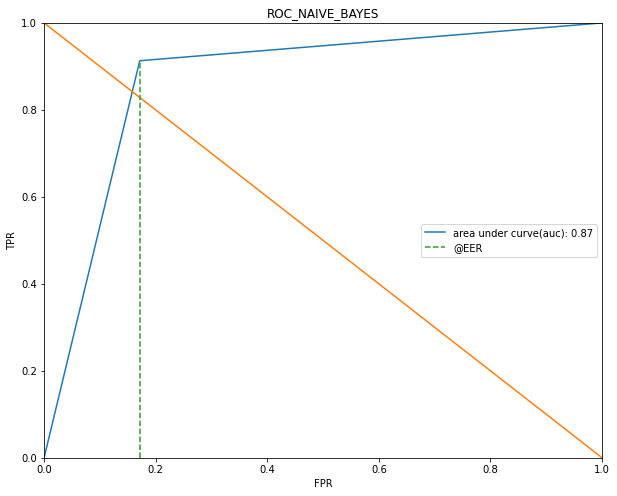

In [ ]:
metric_roc(y_true,y_pred,'ROC_NAIVE_BAYES')

In [ ]:
joblib.dump(gnb, '/content/drive/MyDrive/MBKM RISET/NAIVE_BAYES_DIFF.pkl')

['/content/drive/MyDrive/MBKM RISET/NAIVE_BAYES_DIFF.pkl']

## Load Model

In [ ]:
file_model = "/content/drive/MyDrive/MBKM RISET/SVM_LINEAR_DIFF_2.pkl"
SVM_Model_Linear = joblib.load(file_model)

Score :  0.9900990099009901
Jumlah Support Vector :  162
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.98      1.00      0.99        97

    accuracy                           0.99       202
   macro avg       0.99      0.99      0.99       202
weighted avg       0.99      0.99      0.99       202



Text(0.5, 1.0, 'Confusion matrix')

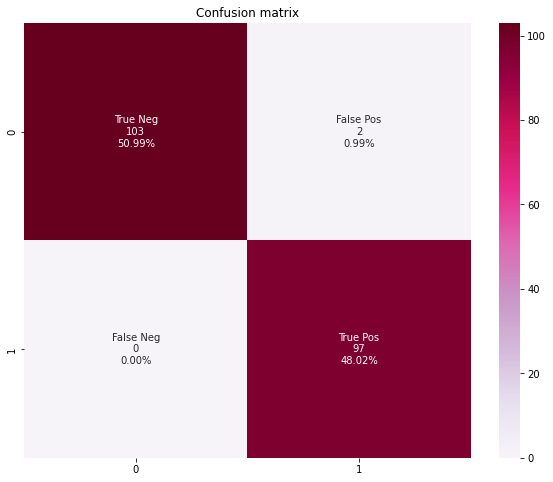

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
print("Score : ", SVM_Model.score(test_feature_2,test_label_2))
print("Jumlah Support Vector : ", len(SVM_Model.support_vectors_))
y_true, y_pred = test_label_2, SVM_Model.predict(test_feature_2)
print(classification_report(y_true, y_pred))
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuRd').set_title("Confusion matrix")

(0.9900990099009901, 0.01904761904761905, 0.0, 0.009523809523809525)

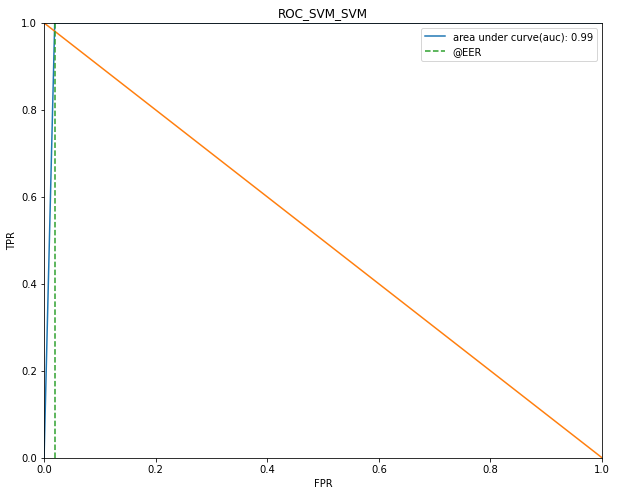

In [ ]:
metric_roc(y_true,y_pred,'ROC_SVM_SVM')

## Error Analysis

In [ ]:
predection

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0], dtype=uint8)

In [ ]:
test_label_2

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0], dtype=uint8)

In [ ]:
error_analysis = []
for index in range(len(y_true)):
  if(y_true[index] != y_pred[index]):
    error_analysis.append(index)

In [ ]:
print("index Fal Pos " + str(error_analysis))

index Fal Pos [29, 108]


index Fal Pos [29, 108]


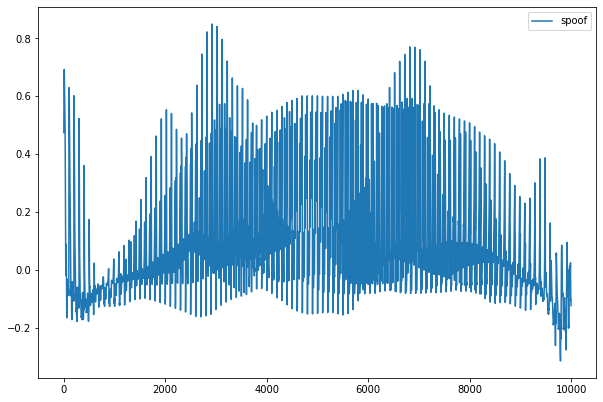

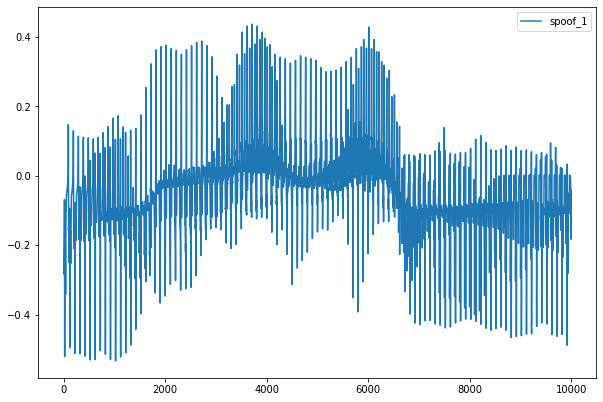

In [ ]:
pylab.rcParams['figure.figsize'] = (10.0, 15.0)
print("index Fal Pos " + str(error_analysis))
ax = plt.subplot(2, 1, 1)
plt.plot(np.squeeze(test_feature_2[29]),label = "spoof")
plt.legend()
plt.show()

ax = plt.subplot(2, 1, 2)
plt.plot(np.squeeze(test_feature_2[108]),label = "spoof_1")
plt.legend()
plt.show()

In [ ]:
error_1 = test_feature_2[29]
error_2 = test_feature_2[108]
a = np.load('live_new.npy')
b = np.load('spoof_new.npy')

In [ ]:
live_data = a[:,:-1]

In [ ]:
spoof_data = b[:,:-1]

In [ ]:
file_error_live = []
for index in range(len(a)):
  if (error_1==live_data[index]).all():
    file_error_live.append(index)
    print(str(file_error_live))

In [ ]:
for index in range(len(a)):
  if (error_2==live_data[index]).all():
    file_error_live.append(index)
    print(str(file_error_live))

In [ ]:
file_error_spoof = []
for index in range(len(a)):
  if (error_1==spoof_data[index]).all():
    file_error_spoof.append(index)
    print(str(file_error_spoof))

[250]


In [ ]:
for index in range(len(a)):
  if (error_2==spoof_data[index]).all():
    file_error_spoof.append(index)
    print(str(file_error_spoof))

[250, 256]


In [ ]:
path_live_background = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/spoof/ID02/006_6466.jpg"
path_live_flash = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/spoof/ID02/006_6467.jpg"
path_spoof_flash = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/spoof/ID04/012_20190227104029_2.jpg"
path_spoof_background = "/content/drive/MyDrive/MBKM RISET/RISET_1/SpecDiff_in_house_database_sample/data/spoof/ID04/012_20190227104029_1.jpg"

In [ ]:
import cv2

In [ ]:
live_flash = cv2.imread(path_live_flash)
live_background = cv2.imread(path_live_background)
spoof_flash = cv2.imread(path_spoof_flash)
spoof_background = cv2.imread(path_spoof_background)

Data Spoof
Index :[250, 256]
Filename Flash 250: 006_6467.jpg
Filename bg 250: 006_6466.jpg
Filename Flash 256: 012_20190227104029_2.jpg
Filename bg 256: 012_20190227104029_1.jpg


(-0.5, 1079.5, 1919.5, -0.5)

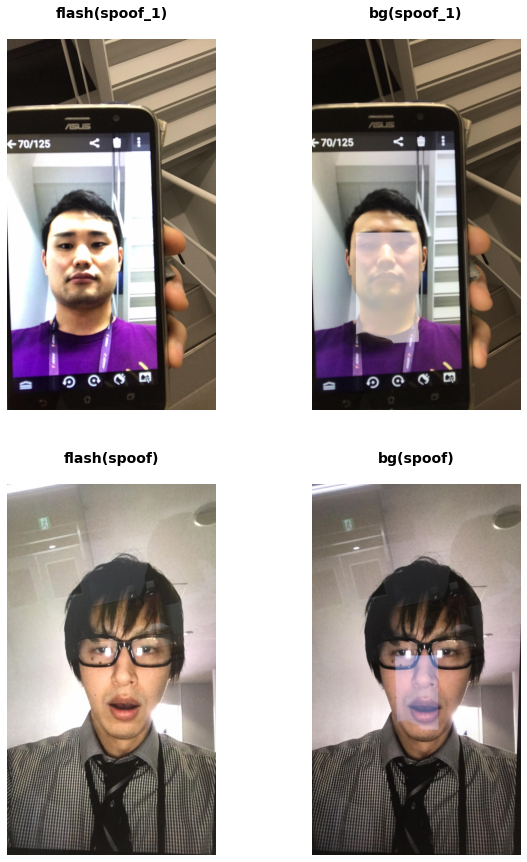

In [ ]:
print("Data Spoof")
print("Index :" + str(file_error_spoof))
print("Filename Flash " + str(file_error_spoof[0]) + ": "+ "006_6467.jpg")
print("Filename bg " + str(file_error_spoof[0]) + ": "+ "006_6466.jpg")
print("Filename Flash " + str(file_error_spoof[1]) + ": "+ "012_20190227104029_2.jpg")
print("Filename bg " + str(file_error_spoof[1]) + ": "+ "012_20190227104029_1.jpg")

title_fontdict = {
  'fontsize': 14,
  'fontweight': 'bold'
}

ax = plt.subplot(2, 2, 1)
plt.title('flash(spoof_1)\n', fontdict=title_fontdict)
plt.imshow(cv2.cvtColor(live_background, cv2.COLOR_BGR2RGB))
plt.axis('off')

ax = plt.subplot(2, 2, 2)
plt.title('bg(spoof_1)\n', fontdict=title_fontdict)
plt.imshow(cv2.cvtColor(live_flash, cv2.COLOR_BGR2RGB))
plt.axis('off')

ax = plt.subplot(2, 2, 3)
plt.title('flash(spoof)\n', fontdict=title_fontdict)
plt.imshow(cv2.cvtColor(spoof_background, cv2.COLOR_BGR2RGB))
plt.axis('off')

ax = plt.subplot(2, 2, 4)
plt.title('bg(spoof)\n', fontdict=title_fontdict)
plt.imshow(cv2.cvtColor(spoof_flash, cv2.COLOR_BGR2RGB))
plt.axis('off')